In [0]:

#para evitar los mensajes "WARNING" de sklearn :/
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
from google.colab import files

import sklearn

from sklearn.model_selection import train_test_split



In [0]:
data_url = ("https://raw.githubusercontent.com/SchoolOfAICDMX/Challenges/master/train.csv")
  
traindata = pd.read_csv(data_url)

testdata_url = ("https://raw.githubusercontent.com/SchoolOfAICDMX/Challenges/master/test.csv")
  
testdata = pd.read_csv(testdata_url)

data=traindata.append(testdata)

import numpy as np

#data.head
data.shape

(23272, 13)

In [0]:
#data= data.sample(frac=1, random_state=85)

#data["YEAR"].dropna(inplace=True)


In [0]:
x_data= data.drop(columns=["page_id","name", "FIRST APPEARANCE"])

x_data.head()

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,dc/marvel
0,NaN,Bad Characters,NaN,Blond Hair,Male Characters,NaN,Deceased Characters,3.0,NaN,dc
1,No Dual Identity,Bad Characters,NaN,Black Hair,Male Characters,NaN,Living Characters,1.0,1962.0,marvel
2,Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,2.0,2005.0,dc
3,Secret Identity,Bad Characters,Black Eyes,No Hair,Male Characters,NaN,Deceased Characters,NaN,1984.0,marvel
4,Secret Identity,Bad Characters,Brown Eyes,Black Hair,Male Characters,NaN,Deceased Characters,3.0,1995.0,marvel


In [0]:
x_data["SEX"]= x_data["SEX"].apply(lambda x:1 if x=="Female Characters" else 0)

x_data["ALIVE"]= x_data["ALIVE"].apply(lambda x:1 if x=="Living Characters" else 0)

x_data["YEAR"]= (x_data["YEAR"]-1900)

x_data.head()

,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,dc/marvel
0,NaN,Bad Characters,NaN,Blond Hair,0,NaN,0,3.0,NaN,dc
1,No Dual Identity,Bad Characters,NaN,Black Hair,0,NaN,1,1.0,62.0,marvel
2,Public Identity,Good Characters,NaN,NaN,0,NaN,1,2.0,105.0,dc
3,Secret Identity,Bad Characters,Black Eyes,No Hair,0,NaN,0,NaN,84.0,marvel
4,Secret Identity,Bad Characters,Brown Eyes,Black Hair,0,NaN,0,3.0,95.0,marvel


In [0]:

x_data["ID"].fillna("Unknown ID Status", inplace=True)

print(x_data["ID"].unique())
print(x_data["ID"].value_counts())



for x in x_data["ID"].value_counts().keys(): 
      x_data[x]=x_data['ID'].apply(lambda d: 1 if d==x else 0)
x_data.drop(columns=['ID'],inplace=True)

x_data.head()

['Unknown ID Status' 'No Dual Identity' 'Public Identity'
 'Secret Identity' 'Known to Authorities Identity' 'Identity Unknown']
Secret Identity                  8683
Public Identity                  6994
Unknown ID Status                5783
No Dual Identity                 1788
Known to Authorities Identity      15
Identity Unknown                    9
Name: ID, dtype: int64


,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,dc/marvel,Secret Identity,Public Identity,Unknown ID Status,No Dual Identity,Known to Authorities Identity,Identity Unknown
0,Bad Characters,NaN,Blond Hair,0,NaN,0,3.0,NaN,dc,0,0,1,0,0,0
1,Bad Characters,NaN,Black Hair,0,NaN,1,1.0,62.0,marvel,0,0,0,1,0,0
2,Good Characters,NaN,NaN,0,NaN,1,2.0,105.0,dc,0,1,0,0,0,0
3,Bad Characters,Black Eyes,No Hair,0,NaN,0,NaN,84.0,marvel,1,0,0,0,0,0
4,Bad Characters,Brown Eyes,Black Hair,0,NaN,0,3.0,95.0,marvel,1,0,0,0,0,0


In [0]:
print(x_data["ALIGN"].unique())

print(x_data["ALIGN"].value_counts())

x_data["ALIGN"].fillna("Unknown Alignment", inplace=True)

print(x_data["ALIGN"].unique())

print(x_data["ALIGN"].value_counts())


for x in x_data["ALIGN"].value_counts().keys(): 
      x_data[x]=x_data['ALIGN'].apply(lambda d: 1 if d==x else 0)
x_data.drop(columns=['ALIGN'],inplace=True)

x_data.head()


['Bad Characters' 'Good Characters' nan 'Neutral Characters'
 'Reformed Criminals']
Bad Characters        9615
Good Characters       7468
Neutral Characters    2773
Reformed Criminals       3
Name: ALIGN, dtype: int64
['Bad Characters' 'Good Characters' 'Unknown Alignment'
 'Neutral Characters' 'Reformed Criminals']
Bad Characters        9615
Good Characters       7468
Unknown Alignment     3413
Neutral Characters    2773
Reformed Criminals       3
Name: ALIGN, dtype: int64


,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,YEAR,dc/marvel,Secret Identity,Public Identity,Unknown ID Status,No Dual Identity,Known to Authorities Identity,Identity Unknown,Bad Characters,Good Characters,Unknown Alignment,Neutral Characters,Reformed Criminals
0,NaN,Blond Hair,0,NaN,0,3.0,NaN,dc,0,0,1,0,0,0,1,0,0,0,0
1,NaN,Black Hair,0,NaN,1,1.0,62.0,marvel,0,0,0,1,0,0,1,0,0,0,0
2,NaN,NaN,0,NaN,1,2.0,105.0,dc,0,1,0,0,0,0,0,1,0,0,0
3,Black Eyes,No Hair,0,NaN,0,NaN,84.0,marvel,1,0,0,0,0,0,1,0,0,0,0
4,Brown Eyes,Black Hair,0,NaN,0,3.0,95.0,marvel,1,0,0,0,0,0,1,0,0,0,0


In [0]:
x_data["GSM"].unique()

x_data["GSM"].fillna("Hetero")

for x in x_data["GSM"].value_counts().keys(): 
      x_data[x]=x_data['GSM'].apply(lambda d: 1 if d==x else 0)
x_data.drop(columns=['GSM'],inplace=True)

x_data.head()


,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,dc/marvel,Secret Identity,Public Identity,Unknown ID Status,...,Good Characters,Unknown Alignment,Neutral Characters,Reformed Criminals,Homosexual Characters,Bisexual Characters,Transgender Characters,Transvestites,Pansexual Characters,Genderfluid Characters
0,NaN,Blond Hair,0,0,3.0,NaN,dc,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Black Hair,0,1,1.0,62.0,marvel,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,0,1,2.0,105.0,dc,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,Black Eyes,No Hair,0,0,NaN,84.0,marvel,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Brown Eyes,Black Hair,0,0,3.0,95.0,marvel,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_data["EYE"].fillna("Eyes not given", inplace= True)

print(x_data["EYE"].value_counts())

x_data["EYE"] = x_data["EYE"].apply(lambda x:x if x=="Eyes not given" or x=="Blue Eyes" or x=="Brown Eyes" or x=="Black Eyes" or x=="Green Eyes" else "Crazy Eyes")

print(x_data["EYE"].value_counts())

for x in x_data["EYE"].value_counts().keys(): 
      x_data[x]=x_data['EYE'].apply(lambda d: 1 if d==x else 0)
x_data.drop(columns=['EYE'],inplace=True)

x_data.head()

Eyes not given        13395
Blue Eyes              3064
Brown Eyes             2803
Black Eyes              967
Green Eyes              904
Red Eyes                716
White Eyes              516
Yellow Eyes             342
Grey Eyes               135
Hazel Eyes               99
Variable Eyes            49
Photocellular Eyes       48
Purple Eyes              45
Orange Eyes              35
Pink Eyes                27
Violet Eyes              23
Gold Eyes                23
One Eye                  21
Amber Eyes               15
Silver Eyes              12
No Eyes                   7
Auburn Hair               7
Multiple Eyes             7
Yellow Eyeballs           6
Black Eyeballs            3
Magenta Eyes              2
Compound Eyes             1
Name: EYE, dtype: int64
Eyes not given    13395
Blue Eyes          3064
Brown Eyes         2803
Crazy Eyes         2139
Black Eyes          967
Green Eyes          904
Name: EYE, dtype: int64


,HAIR,SEX,ALIVE,APPEARANCES,YEAR,dc/marvel,Secret Identity,Public Identity,Unknown ID Status,No Dual Identity,...,Transgender Characters,Transvestites,Pansexual Characters,Genderfluid Characters,Eyes not given,Blue Eyes,Brown Eyes,Crazy Eyes,Black Eyes,Green Eyes
0,Blond Hair,0,0,3.0,NaN,dc,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,Black Hair,0,1,1.0,62.0,marvel,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,NaN,0,1,2.0,105.0,dc,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,No Hair,0,0,NaN,84.0,marvel,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Black Hair,0,0,3.0,95.0,marvel,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
x_data["HAIR"].fillna("No Hair Info Given", inplace=True)

x_data["HAIR"].value_counts()

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"No Hair" if x=="Bald" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Brown Hair" if x=="Auburn Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Brown Hair" if x=="Light Brown Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Blond Hair" if x=="Starwberry Blond Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Blond Hair" if x=="Yellow Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Blond Hair" if x=="Gold Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Blond Hair" if x=="Platinum Gold Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Red Hair" if x=="Orange Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Red Hair" if x=="Reddish Blond Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Red Hair" if x=="Orange-brown Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Red Hair" if x=="Reddish Brown Hair" else x)

x_data["HAIR"]= x_data["HAIR"].apply(lambda x:"Grey Hair" if x=="Silver Hair" else x)


x_data["HAIR"]= x_data["HAIR"].apply(lambda x:x if x=="No Hair Info Given" or x=="Black Hair " or x=="Brown Hair" or x=="Blond Hair" or x=="Red Hair" or x=="White Hair" or x=="Grey Hair" or x=="No Hair" else "Crazy Hair")

x_data["HAIR"].value_counts()

for x in x_data["HAIR"].value_counts().keys(): 
      x_data[x]=x_data['HAIR'].apply(lambda d: 1 if d==x else 0)
x_data.drop(columns=['HAIR'],inplace=True)

x_data.head()


,SEX,ALIVE,APPEARANCES,YEAR,dc/marvel,Secret Identity,Public Identity,Unknown ID Status,No Dual Identity,Known to Authorities Identity,...,Black Eyes,Green Eyes,No Hair Info Given,Crazy Hair,Brown Hair,Blond Hair,No Hair,Red Hair,White Hair,Grey Hair
0,0,0,3.0,NaN,dc,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1.0,62.0,marvel,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.0,105.0,dc,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,NaN,84.0,marvel,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,0,0,3.0,95.0,marvel,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [0]:


list_of_column_names= list(x_data.columns)

list_of_null_columns=[]

i=0

for i in range (len(list_of_column_names)):
  if x_data[list_of_column_names[i]].isnull().values.any()==True:
    list_of_null_columns.append(list_of_column_names[i])
    

print(list_of_null_columns)

numb_na_app= x_data["APPEARANCES"].isna().sum()
  
numb_na_year= x_data["YEAR"].isna().sum()

print("Number of NAN in APPEARANCES:", numb_na_app,"Number of NAN in YEARS:", numb_na_year)

x_data["APPEARANCES"].fillna(x_data["APPEARANCES"].mean(), inplace=True)
x_data["YEAR"].fillna(x_data["YEAR"].mean(), inplace=True)


print(len(x_data))
x_data.dropna(inplace=True)
print(len(x_data))


['APPEARANCES', 'YEAR']
Number of NAN in APPEARANCES: 1451 Number of NAN in YEARS: 884
23272
23272


In [0]:
x_train=()

In [0]:

y_data= x_data["dc/marvel"]

y_data= y_data.apply(lambda x:1 if x=="marvel" else 0)

print(y_data.shape)



x_data.drop(columns=["dc/marvel"],inplace=True)

print(x_data.shape)

(23272,)
(23272, 35)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(x_train.shape,x_test.shape)

(18617, 35) (4655, 35)


In [0]:
from sklearn.decomposition import PCA

training_rows, training_columns= x_data.shape

#We load PCA from Sklearn, the "0.99" means that we want the compression to retain 99% of the original data´s significance. 
pca_compressor=PCA(0.999, svd_solver="full")

#We use the PCA transformer to compress the image and we use the "DataFrame" function to convert it into our favorite pandas format
compressed_x_data = pd.DataFrame(pca_compressor.fit_transform(x_data))

#we get how many columns the new compressed dataset has so that we can compate with the original one.
compressed_rows, compressed_columns = compressed_x_data.shape

#We  print out the comparison between the two
print("number of columns before compression:",training_columns,"\n","number of columns after compression:" ,compressed_columns)

#compressed_training_data.to_excel("pcadata.xlsx")

#files.download("pcadata.xlsx")

compressed_x_data.head()

number of columns before compression: 35 
 number of columns after compression: 2


,0,1
0,-16.005517,-0.405393
1,-17.392811,-24.869332
2,-17.469192,18.144887
3,0.060554,-2.418625
4,-16.218879,8.176933


In [0]:
data_visualization_after_compression = compressed_x_data.join(y_data)

data_visualization_after_compression.head()



,0,1,dc/marvel
0,-16.005517,-0.405393,0.0
0,-16.005517,-0.405393,1.0
1,-17.392811,-24.869332,1.0
1,-17.392811,-24.869332,1.0
2,-17.469192,18.144887,0.0


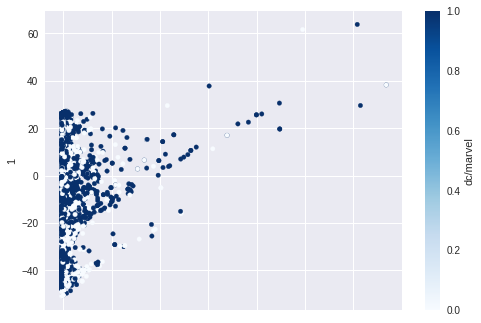

In [0]:
visualization = data_visualization_after_compression.plot.scatter(x=0, y=1, c='dc/marvel', colormap='Blues')

In [0]:
from sklearn.linear_model import LogisticRegression

log_reg_model=LogisticRegression(C=1, class_weight={0:0.62,1:0.38}, max_iter=10000)



log_reg_model.fit(x_data,y_data)

LogisticRegression(C=1, class_weight={0: 0.62, 1: 0.38}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=10000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
print(y_data.mean())

0.7036782399449982


In [0]:
!pip install TPOT

from tpot import TPOTClassifier

In [0]:
#tpot = TPOTClassifier(generations=49,population_size=20, verbosity=2,mutation_rate=0.9,crossover_rate=0.1,scoring='accuracy', cv=8)
#tpot.fit(x_data,y_data)

In [0]:
#tpot.export("superheroeoptmodel.py")

#files.download('superheroeoptmodel.py')

In [0]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer
from copy import copy


# Average CV score on the training set was:0.7727933705491963
opt_model = make_pipeline(
    make_union(
        StackingEstimator(estimator=make_pipeline(
            MinMaxScaler(),
            XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, nthread=1, subsample=0.7000000000000001)
        )),
        FunctionTransformer(copy)
    ),
    RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.25, min_samples_leaf=4, min_samples_split=16, n_estimators=100)
)

opt_model.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=None,
       transformer_list=[('stackingestimator', StackingEstimator(estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('xgbclassifier', XGBClassifier(base_score=0.5, booster='gbtree', colsample_...ors=100, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))])

#F1 score Evaluation

In [0]:
from sklearn.metrics import f1_score
training_predcition = opt_model.predict(x_train)

print("F1 score on Training Data:", f1_score(training_predcition,y_train))

F1 score on Training Data: 0.9035837124154


In [0]:
training_predcition = opt_model.predict(x_test)

print("F1 score on Testing Data:", f1_score(training_predcition,y_test))

F1 score on Testing Data: 0.8519708029197082


#Analysis mas profundo del desempeño del modelo (se tarda 15 minutos en correr)

In [0]:
#initializing our counts of true positive, false negative, etc.
TP=0
TN=0
FP=0
FN=0

#we create what is called a for loop to iterate through every row of the dataset
for i in range(len(y_train)):
    #Counts True Positives if the answer is "1" and the model predicted "1"
    if opt_model.predict(x_train.iloc[[i,]])==1 and y_train.iloc[i]==1:
                                       TP=TP+1
        
    ##Counts False Positives if the answer is "0" and the model predicted "1"
    if opt_model.predict(x_train.iloc[[i,]])==1 and y_train.iloc[i]==0:
                                       FP=FP+1    
    ##Counts True Negatives if the answer is "0" and the model predicted "0"
    if opt_model.predict(x_train.iloc[[i,]])==0 and y_train.iloc[i]==0:
                                       TN=TN+1    
    
    #Counts False Negatives if the answer is "1" and the model predicted "0"
    if opt_model.predict(x_train.iloc[[i,]])==0 and y_train.iloc[i]==1:
                                       FN=FN+1   

print ("Model", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

model_accuracy= (TP+TN)/(len(y_train))
model_precision= TP/(TP+FP) 
model_recall=TP/(TP+FN)
model_f1= 2 * (model_precision * model_recall) / (model_precision + model_recall)

print("Optimal model´s accuracy on training data:", model_accuracy *100,'%')
print("Optimal model´s precision on training data.:", model_precision *100,'%')
print("Optimal model´s recall on training data:", model_recall *100,'%')
print("Optimal model´s F1 on training data:", model_f1 *100,'%')


Model True Positives: 12216 False Positives: 1745 True Negatives: 3794 False Negatives: 862
Optimal model´s accuracy on training data: 85.99666971047967 %
Optimal model´s precision on training data.: 87.50089535133586 %
Optimal model´s recall on training data: 93.408778100627 %
Optimal model´s F1 on training data: 90.35837124154 %


F1_score on Training: 0.9035837124154


In [0]:
#initializing our counts of true positive, false negative, etc.
TP=0
TN=0
FP=0
FN=0

#we create what is called a for loop to iterate through every row of the dataset
for i in range(len(y_test)):
    #Counts True Positives if the answer is "1" and the model predicted "1"
    if opt_model.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==1:
                                       TP=TP+1
        
    ##Counts False Positives if the answer is "0" and the model predicted "1"
    if opt_model.predict(x_test.iloc[[i,]])==1 and y_test.iloc[i]==0:
                                       FP=FP+1    
    ##Counts True Negatives if the answer is "0" and the model predicted "0"
    if opt_model.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==0:
                                       TN=TN+1    
    
    #Counts False Negatives if the answer is "1" and the model predicted "0"
    if opt_model.predict(x_test.iloc[[i,]])==0 and y_test.iloc[i]==1:
                                       FN=FN+1   

print ("Model", "True Positives:",TP, "False Positives:",FP,"True Negatives:",TN , "False Negatives:", FN) 

model_accuracy= (TP+TN)/(TP+FP+TN+FN)
model_precision= TP/(TP+FP) 
model_recall=TP/(TP+FN)
model_f1= 2 * (model_precision * model_recall) / (model_precision + model_recall)

print("Optimal model´s accuracy on test data:", model_accuracy *100,'%')
print("Optimal model´s precision on test data:", model_precision *100,'%')
print("Optimal model´s recall on test data:", model_recall *100,'%')
print("Optimal model´s F1 on test data:", model_f1 *100,'%')


Model True Positives: 2918 False Positives: 634 True Negatives: 723 False Negatives: 380
Optimal model´s accuracy on test data: 78.21697099892589 %
Optimal model´s precision on test data: 82.15090090090091 %
Optimal model´s recall on test data: 88.4778653729533 %
Optimal model´s F1 on test data: 85.19708029197082 %


# TAREA SCHOOL OF AI 08/03/2019

In [0]:
#¿Cuáles son las 10 palabras más utilizadas en la Iliada?

uploaded_text= files.upload()






Saving iliada.txt to iliada.txt


In [0]:

#Exercise 1: Which are the ten most frequen words in the Illiad text.
from collections import Counter

with open('iliada.txt', "r") as text:
    iliada = text.read().lower().replace(',','').replace('.','').split()
    total_word_count=Counter(iliada)
    print(total_word_count.most_common(10))
    
    

    

[('the', 10138), ('and', 6675), ('of', 5749), ('to', 3392), ('he', 2887), ('his', 2540), ('in', 2286), ('a', 1850), ('him', 1760), ('you', 1754)]


In [0]:
#Exercise 2: Which are the ten longest words of this text document.

with open('iliada.txt', "r") as text:
    iliada_for_counting = text.read().lower().replace("--"," ").replace("@"," ").replace("-"," ").replace(',','').replace('.','').replace('http://wwwgutenbergorg/2/1/9/2199/'," ").replace('http://gutenbergnet/license)'," ").replace('http://pglaforg/fundraising',"").replace('http://pglaforg/donate',"").replace('http://wwwgutenbergnet'," ").replace("(trademark/copyright)","").replace("http://wwwpglaforg"," ").split()
    iliada_for_counting=set(iliada_for_counting)
    longest_word_1=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_1)
    longest_word_2=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_2)
    longest_word_3=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_3)
    longest_word_4=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_4)
    longest_word_5=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_5)
    longest_word_6=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_6)
    longest_word_7=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_7)
    longest_word_8=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_8)
    longest_word_9=  max(iliada_for_counting, key=len)
    iliada_for_counting.remove(longest_word_9)
    longest_word_10=  max(iliada_for_counting, key=len)
  
    print("longest_word:",longest_word_1,"\n", "2nd_longest_word:",longest_word_2,"\n","3rd_longest_word:",longest_word_3,"\n","4th_longest_word:",longest_word_4,"\n","5th_longest_word:",longest_word_5, "\n","6th_longest_word:",longest_word_6, "\n","7th_longest_word:",longest_word_7, "\n","8th_longest_word:",longest_word_8,"\n","9th_longest_word:",longest_word_9, "\n","10th_longest_word:",longest_word_10)

  


longest_word: (wwwgutenbergnet) 
 2nd_longest_word: unenforceability 
 3rd_longest_word: http://pglaforg 
 4th_longest_word: representations 
 5th_longest_word: accomplishments 
 6th_longest_word: compassionately 
 7th_longest_word: notwithstanding 
 8th_longest_word: merchantibility 
 9th_longest_word: wwwgutenbergnet 
 10th_longest_word: reconciliation


In [0]:
#Exercise 3: Which of these countries have changed Fifa rankings the most from year to the next:

fifa_data= pd.read_csv("https://raw.githubusercontent.com/SchoolOfAICDMX/Python/master/fifa_ranking.csv")

fifa_data.head(5)

fifa_data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [0]:
key_fifa_data=fifa_data[['rank','country_full','rank_date']]

position_dict={}

rank_year1_list=[5000]
rank_year2_list=[0]


key_fifa_data["rank_year"] = key_fifa_data["rank_date"].astype(str).str[0:4]

key_fifa_data["rank_year"]= key_fifa_data["rank_year"].apply(int)

rank_year2_avg=0


country_names = list(key_fifa_data["country_full"].unique())
#country_names=["Afghanistan"]

countries_left=(len(country_names))


#starting_year=1993

for country in range(len(country_names)):
      
  for year in range(1993,2018):
        
    for i in range(len(key_fifa_data)):
      
      if key_fifa_data["country_full"].iloc[i]==country_names[country] and key_fifa_data["rank_year"].iloc[i]==year:
        rank_year1_list.append(key_fifa_data["rank"].iloc[i])
      rank_year1_avg=np.mean(rank_year1_list)
      position_difference=abs(rank_year1_avg-rank_year2_avg)
      if position_difference > 80:
        position_difference=0
      else:
        position_difference=position_difference
        
    
    #print(rank_year1_avg, "{} in {}".format(country_names[country],year+1),"and",rank_year2_avg, "{} in {}".format(country_names[country],year))
    position_dict["{} from {} to {}".format(country_names[country],year,year+1)]=position_difference
    #print(rank_year1_list)
    rank_year2_avg = np.mean(rank_year1_list)
    rank_year1_list=[0.0000]
    position_difference=0
  countries_left-=1
  print("Countries Left:",countries_left)
      
      


position_dict
#key_fifa_data.head()

#country_names
  

Countries Left: 215
Countries Left: 214
Countries Left: 213
Countries Left: 212
Countries Left: 211
Countries Left: 210
Countries Left: 209
Countries Left: 208
Countries Left: 207
Countries Left: 206
Countries Left: 205
Countries Left: 204
Countries Left: 203
Countries Left: 202
Countries Left: 201
Countries Left: 200
Countries Left: 199
Countries Left: 198
Countries Left: 197
Countries Left: 196
Countries Left: 195
Countries Left: 194
Countries Left: 193
Countries Left: 192
Countries Left: 191
Countries Left: 190
Countries Left: 189
Countries Left: 188
Countries Left: 187
Countries Left: 186
Countries Left: 185
Countries Left: 184
Countries Left: 183
Countries Left: 182
Countries Left: 181
Countries Left: 180
Countries Left: 179
Countries Left: 178
Countries Left: 177
Countries Left: 176
Countries Left: 175
Countries Left: 174
Countries Left: 173
Countries Left: 172
Countries Left: 171
Countries Left: 170
Countries Left: 169
Countries Left: 168
Countries Left: 167
Countries Left: 166


{'Germany from 1993 to 1994': 0,
 'Germany from 1994 to 1995': 0,
 'Germany from 1995 to 1996': 0.9090909090909092,
 'Germany from 1996 to 1997': 1.5454545454545454,
 'Germany from 1997 to 1998': 0.4545454545454546,
 'Germany from 1998 to 1999': 0.0,
 'Germany from 1999 to 2000': 1.9440559440559437,
 'Germany from 2000 to 2001': 2.4615384615384617,
 'Germany from 2001 to 2002': 2.230769230769231,
 'Germany from 2002 to 2003': 2.083333333333333,
 'Germany from 2003 to 2004': 0.5320512820512819,
 'Germany from 2004 to 2005': 4.538461538461538,
 'Germany from 2005 to 2006': 4.076923076923077,
 'Germany from 2006 to 2007': 3.333333333333334,
 'Germany from 2007 to 2008': 7.205128205128204,
 'Germany from 2008 to 2009': 1.0,
 'Germany from 2009 to 2010': 0.1538461538461542,
 'Germany from 2010 to 2011': 0.9423076923076925,
 'Germany from 2011 to 2012': 1.326923076923077,
 'Germany from 2012 to 2013': 0.8461538461538458,
 'Germany from 2013 to 2014': 0.15384615384615397,
 'Germany from 2014 

In [0]:
from heapq import nlargest

ten_biggest_changes = nlargest(10, position_dict, key=position_dict.get)

for name in range(len(ten_biggest_changes)):
  print("number {} biggest change was {} with a change of".format(name+1,ten_biggest_changes[name]),int(position_dict[ten_biggest_changes[name]])," places in the ranks")


number 1 biggest change was Estonia from 1993 to 1994 with a change of 79  places in the ranks
number 2 biggest change was Somalia from 1994 to 1995 with a change of 79  places in the ranks
number 3 biggest change was Palestine from 1999 to 2000 with a change of 77  places in the ranks
number 4 biggest change was Cambodia from 1996 to 1997 with a change of 76  places in the ranks
number 5 biggest change was Belize from 1996 to 1997 with a change of 74  places in the ranks
number 6 biggest change was St Vincent and the Grenadines from 1993 to 1994 with a change of 73  places in the ranks
number 7 biggest change was Azerbaijan from 1993 to 1994 with a change of 73  places in the ranks
number 8 biggest change was St Kitts and Nevis from 1994 to 1995 with a change of 71  places in the ranks
number 9 biggest change was Djibouti from 1995 to 1996 with a change of 71  places in the ranks
number 10 biggest change was South Sudan from 1993 to 1994 with a change of 71  places in the ranks


In [0]:
#Exercise 4: How many countries have entered into the top 10?

countries_in_top_10=[]

key_fifa_data=fifa_data[['rank','country_full','rank_date']]

for i in range(len(key_fifa_data)):
  if key_fifa_data["rank"].iloc[i]< 11:
    countries_in_top_10.append(key_fifa_data["country_full"].iloc[i])
    
countries_in_top_10=set(countries_in_top_10)

print(len(countries_in_top_10),"have entered the top 10 rankings since 1993. Here is the list of these countries:","\n",countries_in_top_10)
    

38 have entered the top 10 rankings since 1993. Here is the list of these countries: 
 {'Yugoslavia', 'Bulgaria', 'Wales', 'USA', 'Uruguay', 'Greece', 'Argentina', 'Netherlands', 'Portugal', 'Czech Republic', 'Croatia', 'Denmark', 'Poland', 'Morocco', 'Ecuador', 'Sweden', 'Norway', 'England', 'Belgium', 'Peru', 'Germany', 'Austria', 'Turkey', 'France', 'Japan', 'Nigeria', 'Colombia', 'Russia', 'Republic of Ireland', 'Mexico', 'Romania', 'Switzerland', 'Italy', 'Spain', 'Brazil', 'Egypt', 'Paraguay', 'Chile'}
